In [1]:
# ==========================
# 1. 標準庫
# ==========================
import sys
import os
import io
import json
import glob
import gc
import datetime
import random
from pathlib import Path
from typing import Dict, List, Union, Callable, Optional, Tuple
import inspect

# ==========================
# 2. 第三方套件
# ==========================
import numpy as np
import xarray as xr
import matplotlib.pylab as plt
from tqdm import trange
from IPython.display import clear_output, display, HTML
from scipy.ndimage import generic_filter

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as Optimizer
import torch.nn.init as init

from torchsummary import summary
import plotly.io as pio
pio.renderers.default = "vscode"  # 或者 "notebook_connected" "vscode"

# import cv2  # 如果影片相關再啟用

# ==========================
# 3. 專案設定
# ==========================
project_root = "C:/Users/GAI/Desktop/Scott/NCA_Research"
if project_root not in sys.path:
    sys.path.append(project_root)

# ==========================
# 4. IPython 魔法指令 (Jupyter 專用)
# ==========================
%reload_ext autoreload
%autoreload 2

# ==========================
# 5. 專案自定義函式庫
# ==========================
from core_utils.plotting import (
    plt_HWC_split_channels,
    plt_CFD_channels,
    plt_random_cfd_slice,
    plot_HW3
)


# from core_utils.utils_io import (
#     np2pil,      # numpy → PIL Image
#     imwrite,     # 儲存圖像為檔案
#     imencode,    # 編碼圖像為 byte stream
#     im2url,      # 圖像轉 base64 URL（HTML 顯示用）
#     load_emoji,   # 載入 emoji 圖像
#     load_cfd_npy
# )

# from core_utils.utils_image import (
#     imshow,      # 在 notebook 顯示圖像
#     tile2d,      # 多圖拼接
#     zoom         # 放大圖像
# )

# from core_utils.utils_video import (
#     save_video,  # 批次輸出影片
#     VideoWriter  # 逐幀寫入影片（支援 context manager）
# )

# from core_utils.ops_tf_np import (
#     to_rgb,
#     to_rgba,
#     to_alpha,
#     crop_and_resize,
#     get_random_cfd_slices,
#     get_random_cfd_slices_pair
# )


from core_utils.viz_train import (
    viz_pool,
    viz_batch,
    viz_loss,
    viz_batch_channels,
    viz_batch_samples
)

from core_utils.viz_batch_results import (
    plot_parallel_from_folder
)


# 6. 實驗項目 utils 函式庫導入
from E4_PI_NCA.utils.helper import (
    to_HWC,
    print_tensor_stats,
    split_cases,
    get_output_path,
    plot_HW3,
    channels_to_rgb,
    print_loss_dict,
    sort_pool_by_mse,
    log_globals,
    check_tensor_nan_inf
)

clear_output()

KeyboardInterrupt: 

In [ ]:

OPTIONS_PATHS = [
    ("model", "channels"),
    ("model", "num_hidden_layers"),
    ("training", "batch_size"),
    ("optim", "lr"),
]

root_dir = "../outputs"
df_top = plot_parallel_from_folder(root_dir, OPTIONS_PATHS, n_best=20, title=None,label_angle=0)
from IPython.display import display
display(df_top)

✅ Loaded 235 runs from ../outputs


,model_name,loss,model.channels,model.num_hidden_layers,training.batch_size,optim.lr,run_path
0,E4-5.1_UrbanTales_GNCA_overfit_dataNorm_202510...,-1.5047,20,3,12,0.001,../outputs\E4-5.1_UrbanTales_GNCA_overfit_data...
1,E4-5.1_UrbanTales_GNCA_overfit_dataNorm_202510...,-1.4724,18,2,12,0.001,../outputs\E4-5.1_UrbanTales_GNCA_overfit_data...
2,E4-5.1_UrbanTales_GNCA_overfit_dataNorm_202510...,-1.4153,24,3,16,0.001,../outputs\E4-5.1_UrbanTales_GNCA_overfit_data...
3,E4-5.1_UrbanTales_GNCA_overfit_dataNorm_202510...,-1.3539,22,2,12,0.001,../outputs\E4-5.1_UrbanTales_GNCA_overfit_data...
4,E4-5.1_UrbanTales_GNCA_overfit_dataNorm_202510...,-1.3103,24,4,8,0.001,../outputs\E4-5.1_UrbanTales_GNCA_overfit_data...
5,E4-5.1_UrbanTales_GNCA_overfit_dataNorm_202510...,-1.3086,18,2,8,0.001,../outputs\E4-5.1_UrbanTales_GNCA_overfit_data...
6,E4-5.0_UrbanTales_GNCA_overfit_20251009-121655...,-1.2827,24,3,12,0.001,../outputs\E4-5.0\E4-5.0_UrbanTales_GNCA_overf...
7,E4-5.1_UrbanTales_GNCA_overfit_dataNorm_202510...,-1.2456,18,2,16,0.001,../outputs\E4-5.1_UrbanTales_GNCA_overfit_data...
8,E4-5.1_UrbanTales_GNCA_overfit_dataNorm_202510...,-1.2320,22,2,8,0.001,../outputs\E4-5.1_UrbanTales_GNCA_overfit_data...
9,E4-5.1_UrbanTales_GNCA_overfit_dataNorm_202510...,-1.1987,22,2,8,0.001,../outputs\E4-5.1_UrbanTales_GNCA_overfit_data...


In [ ]:
# import os

# def rename_recursive(root_dir, old_str="E4_4.1", new_str="E4_4.2"):
#     """
#     遞迴地將 root_dir 下所有檔案與資料夾名稱中包含 old_str 的部分替換為 new_str
#     """
#     for dirpath, dirnames, filenames in os.walk(root_dir, topdown=False):
#         # 處理檔案
#         for fname in filenames:
#             if old_str in fname:
#                 old_path = os.path.join(dirpath, fname)
#                 new_name = fname.replace(old_str, new_str)
#                 new_path = os.path.join(dirpath, new_name)
#                 if os.path.exists(new_path):
#                     print(f"⚠️ Skip (target exists): {new_path}")
#                     continue
#                 os.rename(old_path, new_path)
#                 print(f"✅ Renamed file: {old_path} → {new_path}")

#         # 處理資料夾
#         for dname in dirnames:
#             if old_str in dname:
#                 old_path = os.path.join(dirpath, dname)
#                 new_name = dname.replace(old_str, new_str)
#                 new_path = os.path.join(dirpath, new_name)
#                 if os.path.exists(new_path):
#                     print(f"⚠️ Skip (target exists): {new_path}")
#                     continue
#                 os.rename(old_path, new_path)
#                 print(f"✅ Renamed folder: {old_path} → {new_path}")


# # -------------------------
# # 使用範例
# # -------------------------
# root_dir = r"C:\Users\GAI\Desktop\Scott\NCA_Research\E4_PI_NCA"  # 改成你的根目錄
# rename_recursive(root_dir, old_str="E4-4.4", new_str="E4-5.0")


✅ Renamed file: C:\Users\GAI\Desktop\Scott\NCA_Research\E4_PI_NCA\notebooks\E4-4.4_UrbanTales_dataset_analysis.ipynb → C:\Users\GAI\Desktop\Scott\NCA_Research\E4_PI_NCA\notebooks\E4-5.0_UrbanTales_dataset_analysis.ipynb


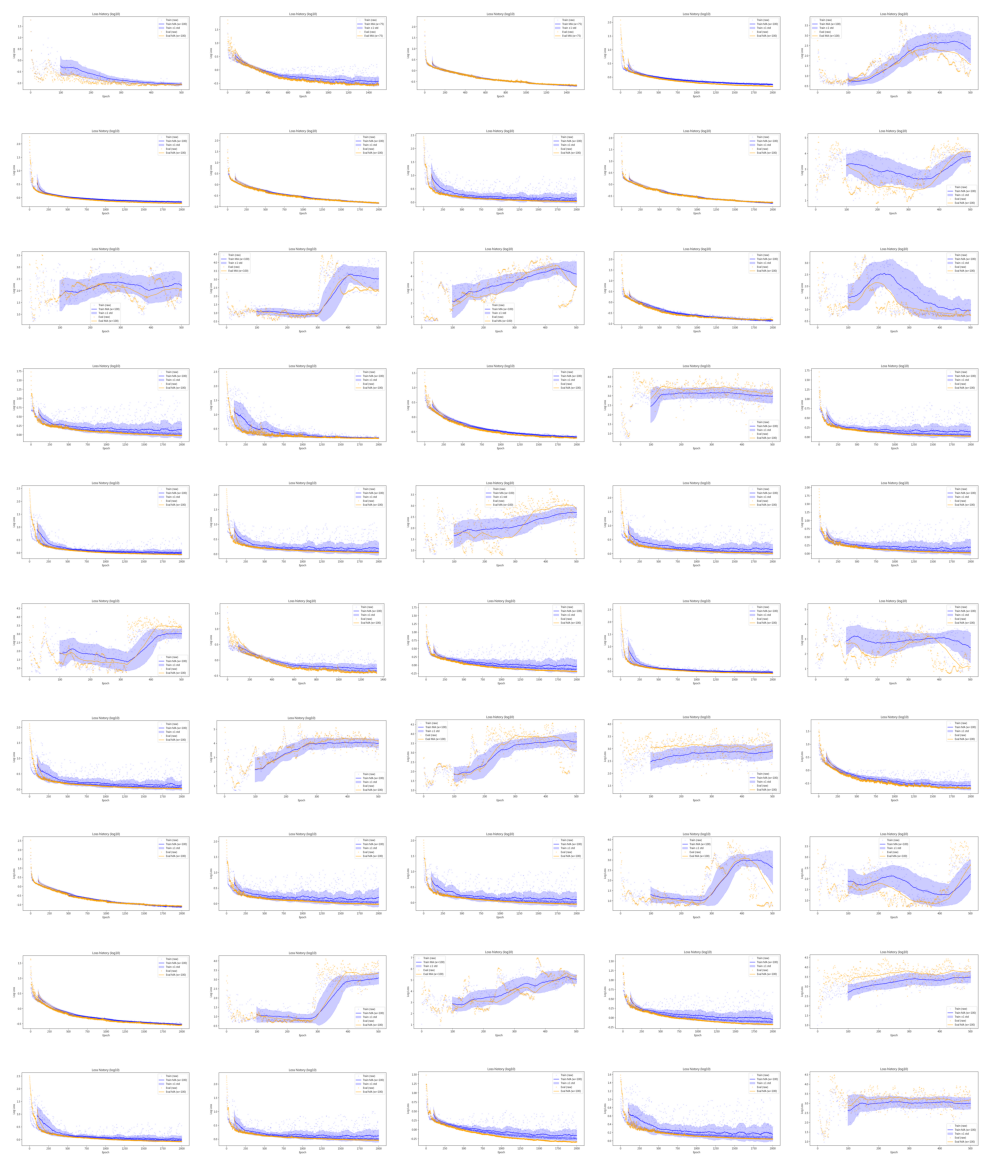

In [6]:
import os
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_all_png(root_dir, cols=4, max_images=50, show_titles=False):
    """
    在同一個 figure 中以 subplot 顯示資料夾內所有 PNG。
    - root_dir: 要搜尋的根目錄
    - cols: 每行顯示的圖片數
    - max_images: 最多顯示圖片數，避免太多導致當機
    """
    png_files = []
    for dirpath, _, filenames in os.walk(root_dir):
        for f in filenames:
            if f.lower().endswith(".png"):
                png_files.append(os.path.join(dirpath, f))

    if not png_files:
        print("No PNG files found.")
        return

    png_files = sorted(png_files)[:max_images]
    n = len(png_files)
    rows = math.ceil(n / cols)

    plt.figure(figsize=(cols * 2, rows * 1.2))
    for i, img_path in enumerate(png_files):
        img = mpimg.imread(img_path)
        ax = plt.subplot(rows, cols, i + 1)
        ax.imshow(img)
        ax.axis("off")
        if show_titles:
            ax.set_title(os.path.relpath(img_path, root_dir), fontsize=8)
    
    plt.tight_layout()
    plt.show()

# 使用範例
path = r"C:\Users\GAI\Desktop\Scott\NCA_Research\E4_PI_NCA\outputs"
show_all_png(path, cols=5, max_images=50, show_titles=False)
